# Managing underwater positions

In [3]:
import pandas as pd
import vectorbtpro as vbt
from datetime import datetime, timedelta
import pytz
import numpy as np
import pandas_ta as ta
import logging
from backtesting import Strategy, Backtest
logging.basicConfig(level=logging.WARNING, format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %I:%M:%S %p')


/Users/ericervin/opt/anaconda3/envs/datascience/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [4]:
symbols = ["SOLUSDT", "BNBUSDT", "ETHUSDT", "BTCUSDT"]
start = "2018-01-01"
# Enter your parameters here
metric = 'total_return'

start_date = datetime(2020, 1, 1, tzinfo=pytz.utc)  # time period for analysis, must be timezone-aware
end_date = datetime.now(pytz.utc)
# end_date = datetime(2020, 1, 1, tzinfo=pytz.utc)

# The following is the number of days to look back for the analysis
time_buffer = timedelta(days=100)  # buffer before to pre-calculate SMA/EMA, best to set to max window
freq = '1h'

vbt.settings.portfolio['init_cash'] = 100_000.  # 100,000$
vbt.settings.portfolio['fees'] = 0.0025  # 0.25%
# vbt.settings.portfolio['slippage'] = 0.0025  # 0.25%

# get binance data doing it this way allows for you to update your data rather than re-downloading it
# binance_data = vbt.BinanceData.fetch(symbols,timeframe=freq, start=start_date,end="now UTC")
# binance_data.save("binance_data.pkl")

# If you already have the data downloaded, you can load it
binance_data = vbt.BinanceData.load("binance_data.pkl")
# binance_data = binance_data.update() if you want to update it.

In [5]:
bnb_data = binance_data.data["BNBUSDT"]
sol_data = binance_data.data["SOLUSDT"]
btc_data = binance_data.data["BTCUSDT"]
eth_data = binance_data.data["ETHUSDT"]
bnb_data = binance_data.data["BNBUSDT"]
sol_data = binance_data.data["SOLUSDT"]
btc_data = binance_data.data["BTCUSDT"]
eth_data = binance_data.data["ETHUSDT"]
# bnb_data.drop(columns=["Close time", "Quote volume", "Number of trades", "Taker base volume", "Taker quote volume"], inplace=True)
# sol_data.drop(columns=["Close time", "Quote volume", "Number of trades", "Taker base volume", "Taker quote volume"], inplace=True)
# btc_data.drop(columns=["Close time", "Quote volume", "Number of trades", "Taker base volume", "Taker quote volume"], inplace=True)
# eth_data.drop(columns=["Close time", "Quote volume", "Number of trades", "Taker base volume", "Taker quote volume"], inplace=True)

In [6]:
# eth_data.tail


In [7]:

df = eth_data
df.dropna(inplace=True)
df

,Open,High,Low,Close,Volume,Quote volume,Trade count,Taker base volume,Taker quote volume
Open time,,,,,,,,,
2020-01-01 00:00:00+00:00,129.16,129.19,128.68,128.87,7769.17336,1.000930e+06,2504,4149.93345,5.346193e+05
2020-01-01 01:00:00+00:00,128.87,130.65,128.78,130.64,11344.65516,1.474278e+06,4885,5930.54276,7.704861e+05
2020-01-01 02:00:00+00:00,130.63,130.98,130.35,130.85,7603.35623,9.940256e+05,3046,3324.35218,4.346754e+05
2020-01-01 03:00:00+00:00,130.85,130.89,129.94,130.20,4968.55433,6.473610e+05,2818,1810.03564,2.358903e+05
2020-01-01 04:00:00+00:00,130.21,130.74,130.15,130.20,3397.90747,4.430067e+05,2264,1839.74371,2.398483e+05
...,...,...,...,...,...,...,...,...,...
2023-05-29 13:00:00+00:00,1898.20,1902.84,1895.80,1900.10,8232.89940,1.563808e+07,17187,3478.40000,6.607148e+06
2023-05-29 14:00:00+00:00,1900.09,1902.57,1885.00,1894.75,14439.17890,2.735379e+07,21559,6043.98480,1.144905e+07
2023-05-29 15:00:00+00:00,1894.74,1899.14,1886.31,1889.41,14199.72270,2.686451e+07,23161,7200.48690,1.362243e+07


## Generate a bunch of random entry signals

In [8]:
import numpy as np
df['signal'] = np.random.random(len(df))
df['signal'] = df['signal'].apply(lambda x: 1 if x<0.5 else 2) # 1 for buy, 2 for sell

In [9]:
df[df['signal']==1].count()+df[df['signal']==2].count()
#len(df)

Open                  29842
High                  29842
Low                   29842
Close                 29842
Volume                29842
Quote volume          29842
Trade count           29842
Taker base volume     29842
Taker quote volume    29842
signal                29842
dtype: int64

In [10]:
df.rename(columns={'Open time':'Datetime'}, inplace=True)

In [11]:
import numpy as np
test_df = df # df.loc['2021'] if you want to test on a specific time period



# df.columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'signal']

class TradingDown(Strategy):
    # Set up some variables to be used by the strategy these can all be optimized
    initsize = .1 # Shown in decimal ie. 0.10 = 10% how much to buy on the first trade
    addsize = .1 # Shown in decimal ie. 0.10 = 10% how much to add to the position
    multiplier = .35 # For position sizing addsize times multiplier if the last trade was a loss
    max_number_of_trades = 400 # Maximum number of trades to have open at any one time

    take_profit = 0.10 # Shown in decimal ie. 0.10 = 10%
    position_loss_threshold = 0.02 # how much does the position have to be down before we add to it Shown in decimal ie. 0.10 = 10% 
    trade_loss_threshold = 0.04 # how much does the trade have to be down before we add to it Shown in decimal ie. 0.10 = 10%
    
    def SIGNAL(self):
        return self.data.signal


    def position_sizer(self) -> float:
        '''
        This is the position sizing function. It will be called on every trade to determine how much to buy or sell
        Currently the logic is to buy XX% of the portfolio on the first trade, then add to the trade if the position is down
        if the last trade is down more than the trade_loss_threshold then add to the position by addsize*multiplier
        '''
        size = 0.01  # Initialize as just 1percent of the portfolio
        # If we have no position, then buy the initsize
        if self.position.size == 0:
            size = self.initsize
        # If we are not down on the position by more than the position_loss_threshold, then return a tiny amount
        # elif self.position.pl_pct > -self.position_loss_threshold:
        #     size = 0.01  # Return tiny amount just 1% of the portfolio
        # If we are down on the position by more than the position_loss_threshold, then add to the position
        elif (self.position.pl_pct < -self.position_loss_threshold and
            len(self.trades) < self.max_number_of_trades):
            if self.trades[-1].pl_pct < -self.trade_loss_threshold: # Check the last trade to see if we are up or down on it
                size = self.addsize*self.multiplier
                return size
            else: 
                # If you are down on the position but the last trade is profitable, then add to the position by a fraction of the addsize
                # Comment the first one out and replace it with the second one to be more conservative
                size = self.addsize * 0.5 # Add a reduced 50% of the addsize 
                # size=0.01

        return size


    
    def init(self):
        super().init()
        self.signal1 = self.I(self.SIGNAL)

    def next(self):
        super().next()
        # Create some variables to make the code easier to read and for logging
        current_cash = self._broker._cash
        current_margin_available = self._broker.margin_available
        current_position_value = self.position.size*self.data.Close[-1]
        logging.info(f"Current cash: {current_cash} Current margin available: {current_margin_available} \
                     Current position value: {current_position_value},  \
                     Current Position PnL: {self.position.pl_pct}")
        
        # Long signals
        # Opening first trade in a group
        if self.signal1==1 and len(self.trades)==0:   # if the signal is 2 and we have no trades open
            tp1 = self.data.Close[-1]*(1+self.take_profit) # Set the take profit price
            self.buy(tp=tp1, size=self.position_sizer()) # add sl=sl1,
            # print(f'Just bought {self.orders[-1].size} total cost: {self.position_sizer()*self.data.Close[-1]}')

        # Adding to a group of trades if the position is down
        elif (
            # if we have a position
            self.position and 
            # if the number of trades is less than the max number of trades
            len(self.trades) < self.max_number_of_trades and 
            # if the entire position's profit/loss percentage is less than the loss threshold
            self.position.pl_pct < -self.position_loss_threshold and
            # if the profit/loss percentage of the last trade is less than the loss threshold
            self.trades[-1].pl_pct < -self.trade_loss_threshold
            ): 
            
            # sl1 = self.data.Close[-1] - self.data.Close[-1]*self.stop_loss_take_profit
            tp1 = self.data.Close[-1] + self.data.Close[-1]*self.take_profit # Set the take profit price
            self.buy(size=self.position_sizer()) # add sl=sl1, tp=tp1
           
        # If the entire group of trades is profitable then close the entire position
        elif self.position.pl_pct > self.take_profit:
            self.position.close()
            logging.info(f'Closed position {self.position.size} with pnl of {self.position.pl} at bar {self.data.index[-1]}')
        

        # Short signals
        # elif self.signal1==2 and len(self.trades) < self.max_number_of_trades:         
        #     # sl1 = self.data.Close[-1] + self.data.Close[-1]*self.stop_loss_take_profit
        #     tp1 = self.data.Close[-1] - self.data.Close[-1]*self.stop_loss_take_profit
        #     self.sell(tp=tp1, size=self.mysize) # add sl=sl1,

In [12]:


bt = Backtest(test_df, 
              TradingDown,
              cash=100000, 
              trade_on_close=True, 
              commission=.00, 
              exclusive_orders=False, 
              margin=.5, # Set this to 0.5 for 2x leverage, 0.25 for 4x leverage, 0.125 for 8x leverage, etc.
              )
stat = bt.run()
print(stat)
bt.plot(resample=False)


Start                     2020-01-01 00:00...
End                       2023-05-29 17:00...
Duration                   1244 days 17:00:00
Exposure Time [%]                   99.819047
Equity Final [$]                   310960.014
Equity Peak [$]                    452545.514
Return [%]                         210.960014
Buy & Hold Return [%]             1364.537906
Return (Ann.) [%]                   39.451181
Volatility (Ann.) [%]               99.364111
Sharpe Ratio                         0.397037
Sortino Ratio                        0.884094
Calmar Ratio                         0.560309
Max. Drawdown [%]                  -70.409731
Avg. Drawdown [%]                   -1.248472
Max. Drawdown Duration      420 days 19:00:00
Avg. Drawdown Duration        3 days 04:00:00
# Trades                                  184
Win Rate [%]                        80.978261
Best Trade [%]                      101.15918
Worst Trade [%]                    -58.514031
Avg. Trade [%]                    

GridPlot(id='p1564', ...)

You can also re-run the backtest manually by changing parameters.
Here is the list of available parameters.
```python
    initsize = .1 # Shown in decimal ie. 0.10 = 10% how much to buy on the first trade
    addsize = .1 # Shown in decimal ie. 0.10 = 10% how much to add to the position
    multiplier = .35 # For position sizing addsize times multiplier if the last trade was a loss
    max_number_of_trades = 400 # Maximum number of trades to have open at any one time
    take_profit = 0.10 # Shown in decimal ie. 0.10 = 10%
    position_loss_threshold = 0.02 # how much does the position have to be down before we add to it Shown in decimal ie. 0.10 = 10% 
    trade_loss_threshold = 0.04 # how much does the trade have to be down before we add to it Shown in decimal ie. 0.10 = 10%
```

In [13]:
# Change a parameter and run the backtest again
new_run = bt.run(
    initsize = .05, # Shown in decimal ie. 0.10 = 10% how much to buy on the first trade
    addsize = .2, # Shown in decimal ie. 0.10 = 10% how much to add to the position
    multiplier =.05, # For position sizing addsize times multiplier if the last trade was a loss
    max_number_of_trades = 40, # Maximum number of trades to have open at any one time

    take_profit = 0.005, # Shown in decimal ie. 0.10 = 10%
    position_loss_threshold = 0.02, # how much does the position have to be down before we add to it Shown in decimal ie. 0.10 = 10% 
    trade_loss_threshold = 0.10, # how much does the trade have to be down before we add to it Shown in decimal ie. 0.10 = 10%
    )
print(new_run)
bt.plot(resample=False)

Start                     2020-01-01 00:00...
End                       2023-05-29 17:00...
Duration                   1244 days 17:00:00
Exposure Time [%]                   98.049729
Equity Final [$]                  147274.1674
Equity Peak [$]                   149016.9674
Return [%]                          47.274167
Buy & Hold Return [%]             1364.537906
Return (Ann.) [%]                   12.004521
Volatility (Ann.) [%]                10.89608
Sharpe Ratio                         1.101728
Sortino Ratio                        1.730349
Calmar Ratio                         0.945483
Max. Drawdown [%]                  -12.696712
Avg. Drawdown [%]                   -0.349735
Max. Drawdown Duration      363 days 20:00:00
Avg. Drawdown Duration        3 days 10:00:00
# Trades                                 1118
Win Rate [%]                        96.958855
Best Trade [%]                      75.152707
Worst Trade [%]                    -54.313394
Avg. Trade [%]                    

GridPlot(id='p2676', ...)

## Analyze the trades and cashflows

In [14]:
# print the trades
stat['_trades'].loc[stat['_trades']['PnL'] < 0] # Print only the trades that lost money

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Tag,Duration
17,29,1640,2756,194.50,194.36,-4.06,-0.000720,2020-03-09 15:00:00+00:00,2020-04-25 05:00:00+00:00,None,46 days 14:00:00
18,29,1623,2756,203.78,194.36,-273.18,-0.046226,2020-03-08 22:00:00+00:00,2020-04-25 05:00:00+00:00,None,47 days 07:00:00
19,29,1452,2756,212.95,194.36,-539.11,-0.087297,2020-03-01 18:00:00+00:00,2020-04-25 05:00:00+00:00,None,54 days 11:00:00
20,29,1354,2756,222.13,194.36,-805.33,-0.125017,2020-02-26 16:00:00+00:00,2020-04-25 05:00:00+00:00,None,58 days 13:00:00
21,29,1347,2756,235.53,194.36,-1193.93,-0.174797,2020-02-26 09:00:00+00:00,2020-04-25 05:00:00+00:00,None,58 days 20:00:00
22,29,1119,2756,246.31,194.36,-1506.55,-0.210913,2020-02-16 16:00:00+00:00,2020-04-25 05:00:00+00:00,None,68 days 13:00:00
23,28,1095,2756,267.04,194.36,-2035.04,-0.272169,2020-02-15 16:00:00+00:00,2020-04-25 05:00:00+00:00,None,69 days 13:00:00
24,86,1072,2756,279.18,194.36,-7294.52,-0.303818,2020-02-14 17:00:00+00:00,2020-04-25 05:00:00+00:00,None,70 days 12:00:00
49,64,5850,7438,463.52,443.42,-1286.40,-0.043364,2020-09-01 06:00:00+00:00,2020-11-06 10:00:00+00:00,None,66 days 04:00:00
101,26,9969,10485,2022.20,1913.51,-2825.94,-0.053748,2021-02-20 04:00:00+00:00,2021-03-13 17:00:00+00:00,None,21 days 13:00:00


In [15]:
stat['_trades'][['PnL', 'ReturnPct', 'Duration']].describe() # Print some stats on the trades


,PnL,ReturnPct,Duration
count,184.000000,184.000000,184
mean,1146.521815,0.105882,90 days 13:34:53.478260870
std,5540.191035,0.252579,158 days 18:08:33.269800490
min,-50446.520000,-0.585140,0 days 03:00:00
25%,802.425000,0.049172,4 days 20:30:00
50%,2148.829000,0.100000,15 days 15:30:00
75%,3381.210000,0.171750,68 days 19:00:00
max,8318.000000,1.011592,572 days 12:00:00


# Now let's run the optimization
Note the `skopt` method isn't working. I think skopt needs to be updated. I'm running this in grid mode so it'll take a while.

In [16]:
import numpy as np

optimize_result, heatmap = bt.optimize(
    initsize                =np.arange(0.1, 0.5, 0.1).tolist(),
    addsize                 =np.arange(0.1,  0.5, 0.1).tolist(),
    take_profit             =np.arange(0.005, 0.05, 0.005).tolist(),
    position_loss_threshold =np.arange(0.01, 0.05, 0.01).tolist(),
    trade_loss_threshold    =np.arange(0.01, 0.05, 0.01).tolist(),
    max_number_of_trades    =np.arange(10, 100, 5).tolist(),
    multiplier              =np.arange(0.1, .5, 0.1).tolist(),
    # Choose a a metric to maximize
    # maximize='Equity Final [$]',
    maximize = 'Sortino Ratio',
    # maximize = 'Max. Drawdown [%]',
    method='grid',
    # method='skopt',
    max_tries=100,
    random_state=42,
    return_heatmap=True,
)
optimize_result


/Users/ericervin/opt/anaconda3/envs/datascience/lib/python3.10/site-packages/backtesting/backtesting.py:1426: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/13 [00:00<?, ?it/s]

KeyboardInterrupt: 

Depending on your machine, the above will take between 1-5 mins so not bad. 

In [ ]:
heatmap.sort_values().iloc[-25:] # Get the three best result from the heatmap

initsize  addsize  take_profit  position_loss_threshold  trade_loss_threshold  max_number_of_trades  multiplier
0.1       0.4      0.005        0.02                     0.03                  65                    0.1           0.778298
          0.3      0.025        0.01                     0.02                  70                    0.1           0.793392
                   0.015        0.01                     0.02                  80                    0.1           0.823970
0.3       0.1      0.035        0.04                     0.04                  40                    0.6           0.832241
0.1       0.4      0.015        0.01                     0.04                  25                    0.1           0.832823
0.3       0.4      0.035        0.03                     0.02                  40                    0.1           0.857847
0.1       0.3      0.035        0.03                     0.02                  85                    0.1           0.860586
0.2       0.4      0

In [ ]:
# Plot the heatmap
%matplotlib inline
from backtesting.lib import plot_heatmaps
plot_heatmaps(heatmap, agg='mean');


When working with the skopt method you might run into errors. 

If you are getting the np.int error read here. https://github.com/scikit-optimize/scikit-optimize/issues/1138 simple fix is to

``` python
import numpy as np
np.int = int
``` 

however that will only leave you with the next error which I show above. 
`InvalidParameterError: The 'criterion' parameter of ExtraTreesRegressor must be a str among {'squared_error', 'friedman_mse', 'absolute_error', 'poisson'}. Got 'mse' instead.`

# Now create a new class with some time constraints and market dynamics
Note, these are all waaaaay overcommented I did that for others to be able to learn and play around. 

In [ ]:
# Test some minute data to see if we can catch smaller bounces also build in a daily stop loss or take profit overlay to stop trading for the day

class TradingDownV2(Strategy):
    '''
    This strategy will buy when the signal is 1, it will then add to the postition as markets move against it.
    You can set the parameters to control how much to buy and how much to add to the position.
    This also has a time_threshold parameter which causes the acceptable exit profit or loss based on a decaying time threshold. 
    The more time you spend in the trade the more aggressive the system is at getting you out of the trade, even for a loss.
    '''
    
    # Set up some variables to be used by the strategy these can all be optimized
    initsize = .1 # Shown in decimal ie. 0.10 = 10% how much to buy on the first trade
    addsize = .1 # Shown in decimal ie. 0.10 = 10% how much to add to the position
    multiplier = .35 # For position sizing addsize times multiplier if the last trade was a loss
    max_number_of_trades = 400 # Maximum number of trades to have open at any one time
    reduce = True, # Reduce the position size if the last trade was a in profit
    take_profit = 0.01 # Shown in decimal ie. 0.10 = 10%
    position_loss_threshold = 0.02 # how much does the position have to be down before we add to it Shown in decimal ie. 0.10 = 10% 
    trade_loss_threshold = 0.10 # how much does the trade have to be down before we add to it Shown in decimal ie. 0.10 = 10%
    time_threshold = 480 # How long do we wait before we start aggressively trying to exit the trade
    def SIGNAL(self):
        return self.data.signal
    
    def acceptable_profit_or_loss(self) -> float:
        '''
        This is the acceptable profit or loss function. It will be called on every trade to determine if the trade is profitable enough to close
        Currently the logic is to close the trade if the trade is up more than the take_profit
        '''
        if not self.position:
             return self.take_profit
        else:
            assert isinstance(self.trades[0].entry_time, pd.Timestamp), "Entry time should be a Timestamp"
            time_in_position = self.data.index[-1] - self.trades[0].entry_time # Get the time in the position
            if time_in_position > pd.Timedelta(minutes=self.time_threshold): # If we have been in the position for more than 8 hours
                # Reduce the take profit by 10% for every hour we are in the position
                return self.take_profit - ((time_in_position - pd.Timedelta(minutes=self.time_threshold)).seconds / 3600 / 2) # This will start going negative

        return self.take_profit

    def position_sizer(self) -> float:
        '''
        This is the position sizing function. It will be called on every trade to determine how much to buy or sell
        Currently the logic is to buy XX% of the portfolio on the first trade, then add to the trade if the position is down
        if the last trade is down more than the trade_loss_threshold then add to the position by addsize*multiplier
        '''
        size = 0.01  # Initialize as just 1percent of the portfolio
        # If we have no position, then buy the initsize
        if self.position.size == 0:
            size = self.initsize
        # If we are not down on the position by more than the position_loss_threshold, then return a tiny amount
        # elif self.position.pl_pct > -self.position_loss_threshold:
        #     size = 0.01  # Return tiny amount just 1% of the portfolio
        # If we are down on the position by more than the position_loss_threshold, then add to the position
        elif (self.position.pl_pct < -self.position_loss_threshold and
            len(self.trades) < self.max_number_of_trades):
            if self.trades[-1].pl_pct < -self.trade_loss_threshold: # Check the last trade to see if we are up or down on it
                size = self.addsize*self.multiplier
                return size
            else: 
                # If you are down on the position but the last trade is profitable, then add to the position by a fraction of the addsize
                # Comment the first one out and replace it with the second one to be more conservative
                size = self.addsize * 0.5 # Add a reduced 50% of the addsize 
                # size=0.01

        return size


    
    def init(self):
        super().init()
        self.signal1 = self.I(self.SIGNAL)

    def next(self):
        super().next()
        # Create some variables to make the code easier to read and for logging
        current_cash = self._broker._cash
        current_margin_available = self._broker.margin_available
        current_position_value = self.position.size*self.data.Close[-1]
        profit_or_loss_trigger = self.acceptable_profit_or_loss() # Decaying take profit level as time goes on
        # Note the logging takes a bit of time so it will slow down the backtest you can use print statements which are much faster. To log info level messages set logging to logging.info
        logging.info(f"Current cash: {current_cash} Current margin available: {current_margin_available} \
                     Current position value: {current_position_value},  \
                     Current Position PnL: {self.position.pl_pct}")
        
        # Long signals
        # Opening first trade in a group
        if self.signal1==1 and len(self.trades)==0:   # if the signal is 2 and we have no trades open
            tp1 = self.data.Close[-1]*(1+self.take_profit) # Set the take profit price
            self.buy(tp=tp1, size=self.position_sizer()) # add sl=sl1,
            # print(f'Just bought {self.orders[-1].size} total cost: {self.position_sizer()*self.data.Close[-1]}')
        
        # Adding to a group of trades if the position is down
        elif (
            # if we have a position
            self.position and 
            # if the number of trades is less than the max number of trades
            len(self.trades) < self.max_number_of_trades and 
            # if the entire position's profit/loss percentage is less than the loss threshold
            self.position.pl_pct < -self.position_loss_threshold and
            # if the profit/loss percentage of the last trade is less than the loss threshold
            self.trades[-1].pl_pct < -self.trade_loss_threshold
            ): 
            
            # sl1 = self.data.Close[-1] - self.data.Close[-1]*self.stop_loss_take_profit
            tp1 = self.data.Close[-1] + self.data.Close[-1]*self.take_profit # Set the take profit price
            self.buy(size=self.position_sizer()) # add sl=sl1, tp=tp1
        
        # Exiting trades
        elif self.reduce: # If we are reducing the position size
            # Partial Exits if we have a position but the market has moved up since our last trade 
            if (self.position and self.trades[-1].pl_pct > profit_or_loss_trigger): # looking for more than 3x the take profit because it is just a single trade
                self.sell(size=self.trades[-1].size)
            
            elif profit_or_loss_trigger < 0: # if there is decay then we want to be aggressive sellers
                self.position.close(portion=.75) # sell 75% of the position
                logging.info(f'Closed trade {self.trades[-1].size} with pnl of {self.trades[-1].pl} at bar {self.data.index[-1]}')
        
        elif (self.position.pl_pct > profit_or_loss_trigger ): # if the position is up more than the acceptable profit or loss
            self.position.close() # close the entire position
            logging.info(f"Closing position with because over the profit_or_loss trigger {profit_or_loss_trigger} the trade Pnl was {self.position.pl_pct}")

     


Note the winrate will go way down but the results will improve because we are chopping off the fat tails. We are aggressively getting out of a losing trade if it has gone on for a long period of time willing to accept a lower profit or larger loss as the trade goes on.

In [ ]:

new_bt = Backtest(test_df, 
              TradingDownV2,
              cash=100000, 
              trade_on_close=True, 
              commission=.00, 
              exclusive_orders=False, 
              margin=.3, # Set this to 0.5 for 2x leverage, 0.25 for 4x leverage, 0.125 for 8x leverage, etc.
              )
new_stat = new_bt.run()
print(new_stat)
new_bt.plot(resample=False, show_legend=True)

Start                     2020-01-01 00:00...
End                       2023-05-29 17:00...
Duration                   1244 days 17:00:00
Exposure Time [%]                   89.722539
Equity Final [$]                   203018.342
Equity Peak [$]                   228018.5421
Return [%]                         103.018342
Buy & Hold Return [%]             1364.537906
Return (Ann.) [%]                   23.089574
Volatility (Ann.) [%]               30.508398
Sharpe Ratio                         0.756827
Sortino Ratio                        1.257482
Calmar Ratio                         0.824573
Max. Drawdown [%]                  -28.001869
Avg. Drawdown [%]                   -1.216487
Max. Drawdown Duration      744 days 12:00:00
Avg. Drawdown Duration        6 days 09:00:00
# Trades                                 4647
Win Rate [%]                        69.270497
Best Trade [%]                      31.732561
Worst Trade [%]                    -29.813473
Avg. Trade [%]                    

GridPlot(id='p3788', ...)

In [ ]:
optimize_result, heatmap = new_bt.optimize(
    initsize                =np.arange(0.1, 0.5, 0.1).tolist(),
    addsize                 =np.arange(0.1,  0.2, 0.1).tolist(),
    take_profit             =np.arange(0.005, 0.05, 0.005).tolist(),
    position_loss_threshold =np.arange(0.01, 0.05, 0.01).tolist(),
    trade_loss_threshold    =np.arange(0.01, 0.05, 0.01).tolist(),
    max_number_of_trades    =np.arange(10, 100, 5).tolist(),
    multiplier              =np.arange(0.1, .5, 0.1).tolist(),
    reduce                  =[True, False],
    time_threshold          =np.arange(180, 1200, 60).tolist(),
    # Choose a a metric to maximize
    # maximize='Equity Final [$]',
    maximize = 'Sortino Ratio',
    # maximize = 'Max. Drawdown [%]',
    method='grid',
    # method='skopt',
    max_tries=100,
    random_state=42,
    return_heatmap=True,
)
optimize_result


/Users/ericervin/opt/anaconda3/envs/datascience/lib/python3.10/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/13 [00:00<?, ?it/s]

Start                     2020-01-01 00:00...
End                       2023-05-29 17:00...
Duration                   1244 days 17:00:00
Exposure Time [%]                   92.292742
Equity Final [$]                 1456055.4728
Equity Peak [$]                  2008358.9184
Return [%]                        1356.055473
Buy & Hold Return [%]             1364.537906
Return (Ann.) [%]                  119.227263
Volatility (Ann.) [%]              133.952814
Sharpe Ratio                         0.890069
Sortino Ratio                        3.260435
Calmar Ratio                         2.550199
Max. Drawdown [%]                  -46.752144
Avg. Drawdown [%]                    -1.99598
Max. Drawdown Duration      745 days 02:00:00
Avg. Drawdown Duration        3 days 23:00:00
# Trades                                 5066
Win Rate [%]                        36.991709
Best Trade [%]                      28.586214
Worst Trade [%]                    -28.713969
Avg. Trade [%]                    

In [ ]:
new_bt.plot(resample=False, show_legend=True)

/Users/ericervin/opt/anaconda3/envs/datascience/lib/python3.10/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/ericervin/opt/anaconda3/envs/datascience/lib/python3.10/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


GridPlot(id='p54500', ...)

In [ ]:
heatmap.sort_values().tail(10)

initsize  addsize  take_profit  position_loss_threshold  trade_loss_threshold  max_number_of_trades  multiplier  reduce  time_threshold
0.1       0.1      0.045        0.01                     0.02                  60                    0.1         True    1140              2.239647
0.3       0.1      0.040        0.03                     0.02                  85                    0.3         False   900               2.271772
0.2       0.1      0.040        0.03                     0.02                  65                    0.2         False   960               2.272136
0.4       0.1      0.035        0.02                     0.04                  35                    0.3         False   1080              2.335148
                   0.030        0.01                     0.02                  35                    0.2         True    900               2.359327
                                0.03                     0.02                  25                    0.1         True    780

In [ ]:
# Get the best params and run the backtest
# Get the last row's parameters
best_params = heatmap.sort_values().index[-1]

# Create a dictionary where keys are the parameter names and values are the last row's values
params = dict(zip(heatmap.index.names, best_params))

# Instantiate your strategy with the optimal parameters
best_sortino = new_bt.run(**params)

In [ ]:
print(best_sortino)
new_bt.plot(resample=False, show_legend=True)

Start                     2020-01-01 00:00...
End                       2023-05-29 17:00...
Duration                   1244 days 17:00:00
Exposure Time [%]                   92.292742
Equity Final [$]                 1456055.4728
Equity Peak [$]                  2008358.9184
Return [%]                        1356.055473
Buy & Hold Return [%]             1364.537906
Return (Ann.) [%]                  119.227263
Volatility (Ann.) [%]              133.952814
Sharpe Ratio                         0.890069
Sortino Ratio                        3.260435
Calmar Ratio                         2.550199
Max. Drawdown [%]                  -46.752144
Avg. Drawdown [%]                    -1.99598
Max. Drawdown Duration      745 days 02:00:00
Avg. Drawdown Duration        3 days 23:00:00
# Trades                                 5066
Win Rate [%]                        36.991709
Best Trade [%]                      28.586214
Worst Trade [%]                    -28.713969
Avg. Trade [%]                    

/Users/ericervin/opt/anaconda3/envs/datascience/lib/python3.10/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/ericervin/opt/anaconda3/envs/datascience/lib/python3.10/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


GridPlot(id='p55612', ...)

# Now look at working with 1 minute data
The lower resolution should provide for more opportunities to exit on a volatile bounce. This will be a more realistic experience.

In [ ]:
eth_1m = pd.read_csv('ETHUSDT_1m.csv', index_col=0, parse_dates=True)
eth_1m.dropna(inplace=True)
eth_1m.rename(columns={'Open time':'Datetime'}, inplace=True)

eth_1m


,Open,High,Low,Close,Volume,Close time,Quote volume,Number of trades,Taker base volume,Taker quote volume
Open time,,,,,,,,,,
2021-01-01 07:00:00+00:00,739.87,739.98,739.54,739.58,95.04463,2021-01-01 07:00:59.999000+00:00,7.031069e+04,163,17.25030,12760.330821
2021-01-01 07:01:00+00:00,739.58,739.72,739.22,739.36,64.01552,2021-01-01 07:01:59.999000+00:00,4.734228e+04,146,33.39303,24695.125930
2021-01-01 07:02:00+00:00,739.36,740.51,739.35,740.50,182.32321,2021-01-01 07:02:59.999000+00:00,1.349136e+05,220,124.39586,92054.165544
2021-01-01 07:03:00+00:00,740.50,740.50,739.64,739.72,170.46406,2021-01-01 07:03:59.999000+00:00,1.261421e+05,227,87.53319,64769.086383
2021-01-01 07:04:00+00:00,739.80,740.50,739.80,740.48,400.01740,2021-01-01 07:04:59.999000+00:00,2.960853e+05,185,306.52244,226877.995034
...,...,...,...,...,...,...,...,...,...,...
2023-03-18 17:37:00+00:00,1770.10,1774.50,1770.09,1773.78,666.18480,2023-03-18 17:37:59.999000+00:00,1.181258e+06,1151,306.73420,543854.114836
2023-03-18 17:38:00+00:00,1773.77,1776.18,1773.13,1773.13,547.14870,2023-03-18 17:38:59.999000+00:00,9.710400e+05,1115,214.17870,380069.893673
2023-03-18 17:39:00+00:00,1773.10,1776.27,1772.92,1775.36,308.96130,2023-03-18 17:39:59.999000+00:00,5.484906e+05,750,194.12690,344590.098543


Generate the signals. I'm going to set a buy signal every 3 hours. 

In [ ]:
# Generate buy signals ever 3 hours (180 minutes)
signal = np.zeros(len(eth_1m))
signal[::180] = 1
signal = pd.Series(signal, index=eth_1m.index)
print(signal[::180].tail(10)) 

# Add it to the dataframe
eth_1m['signal'] = signal

# Create a smaller dataframe to backtest initially
eth_1m_small = eth_1m.iloc[:200000]
eth_1m_small


Open time
2023-03-17 14:33:00+00:00    1.0
2023-03-17 17:33:00+00:00    1.0
2023-03-17 20:33:00+00:00    1.0
2023-03-17 23:33:00+00:00    1.0
2023-03-18 02:33:00+00:00    1.0
2023-03-18 05:33:00+00:00    1.0
2023-03-18 08:33:00+00:00    1.0
2023-03-18 11:33:00+00:00    1.0
2023-03-18 14:33:00+00:00    1.0
2023-03-18 17:33:00+00:00    1.0
dtype: float64


,Open,High,Low,Close,Volume,Close time,Quote volume,Number of trades,Taker base volume,Taker quote volume,signal
Open time,,,,,,,,,,,
2021-01-01 07:00:00+00:00,739.87,739.98,739.54,739.58,95.04463,2021-01-01 07:00:59.999000+00:00,7.031069e+04,163,17.25030,1.276033e+04,1.0
2021-01-01 07:01:00+00:00,739.58,739.72,739.22,739.36,64.01552,2021-01-01 07:01:59.999000+00:00,4.734228e+04,146,33.39303,2.469513e+04,0.0
2021-01-01 07:02:00+00:00,739.36,740.51,739.35,740.50,182.32321,2021-01-01 07:02:59.999000+00:00,1.349136e+05,220,124.39586,9.205417e+04,0.0
2021-01-01 07:03:00+00:00,740.50,740.50,739.64,739.72,170.46406,2021-01-01 07:03:59.999000+00:00,1.261421e+05,227,87.53319,6.476909e+04,0.0
2021-01-01 07:04:00+00:00,739.80,740.50,739.80,740.48,400.01740,2021-01-01 07:04:59.999000+00:00,2.960853e+05,185,306.52244,2.268780e+05,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20 14:18:00+00:00,2889.45,2898.44,2881.45,2881.45,1198.72256,2021-05-20 14:18:59.999000+00:00,3.464641e+06,2063,627.12603,1.812550e+06,0.0
2021-05-20 14:19:00+00:00,2881.74,2886.27,2863.25,2865.70,2754.56918,2021-05-20 14:19:59.999000+00:00,7.913081e+06,4075,1423.58010,4.089939e+06,0.0
2021-05-20 14:20:00+00:00,2865.45,2887.79,2865.02,2887.79,1731.44483,2021-05-20 14:20:59.999000+00:00,4.980597e+06,2839,965.79574,2.777931e+06,0.0


In [ ]:
# Test some minute data to see if we can catch smaller bounces also build in a daily stop loss or take profit overlay to stop trading for the day

class TradingDownV2(Strategy):
    '''
    This strategy will buy when the signal is 1, it will then add to the postition as markets move against it.
    You can set the parameters to control how much to buy and how much to add to the position.
    This also has a time_threshold parameter which causes the acceptable exit profit or loss based on a decaying time threshold. 
    The more time you spend in the trade the more aggressive the system is at getting you out of the trade, even for a loss.
    '''
    
    # Set up some variables to be used by the strategy these can all be optimized
    initsize = .1 # Shown in decimal ie. 0.10 = 10% how much to buy on the first trade
    addsize = .1 # Shown in decimal ie. 0.10 = 10% how much to add to the position
    multiplier = .35 # For position sizing addsize times multiplier if the last trade was a loss
    max_number_of_trades = 400 # Maximum number of trades to have open at any one time
    reduce = True, # Reduce the position size if the last trade was a in profit
    take_profit = 0.005 # Shown in decimal ie. 0.10 = 10%
    position_loss_threshold = 0.02 # how much does the position have to be down before we add to it Shown in decimal ie. 0.10 = 10% 
    trade_loss_threshold = 0.0 # how much does the trade have to be down before we add to it Shown in decimal ie. 0.10 = 10%
    time_threshold = 480 # How long do we wait before we start aggressively trying to exit the trade
    def SIGNAL(self):
        return self.data.signal
    
    def acceptable_profit_or_loss(self) -> float:
        '''
        This is the acceptable profit or loss function. It will be called on every trade to determine if the trade is profitable enough to close
        Currently the logic is to close the trade if the trade is up more than the take_profit
        '''
        if not self.position:
             return self.take_profit
        else:
            assert isinstance(self.trades[0].entry_time, pd.Timestamp), "Entry time should be a Timestamp"
            time_in_position = self.data.index[-1] - self.trades[0].entry_time # Get the time in the position
            if time_in_position > pd.Timedelta(minutes=self.time_threshold): # If we have been in the position for more than 8 hours
                # Reduce the take profit by 10% for every hour we are in the position
                return self.take_profit - ((time_in_position - pd.Timedelta(minutes=self.time_threshold)).seconds / 3600 / 2) # This will start going negative

        return self.take_profit

    def position_sizer(self) -> float:
        '''
        This is the position sizing function. It will be called on every trade to determine how much to buy or sell
        Currently the logic is to buy XX% of the portfolio on the first trade, then add to the trade if the position is down
        if the last trade is down more than the trade_loss_threshold then add to the position by addsize*multiplier
        '''
        size = 0.01  # Initialize as just 1percent of the portfolio
        # If we have no position, then buy the initsize
        if self.position.size == 0:
            size = self.initsize
        # If we are not down on the position by more than the position_loss_threshold, then return a tiny amount
        # elif self.position.pl_pct > -self.position_loss_threshold:
        #     size = 0.01  # Return tiny amount just 1% of the portfolio
        # If we are down on the position by more than the position_loss_threshold, then add to the position
        elif (self.position.pl_pct < -self.position_loss_threshold and
            len(self.trades) < self.max_number_of_trades):
            if self.trades[-1].pl_pct < -self.trade_loss_threshold: # Check the last trade to see if we are up or down on it
                size = self.addsize*self.multiplier
                return size
            else: 
                # If you are down on the position but the last trade is profitable, then add to the position by a fraction of the addsize
                # Comment the first one out and replace it with the second one to be more conservative
                size = self.addsize * 0.5 # Add a reduced 50% of the addsize 
                # size=0.01

        return size


    
    def init(self):
        super().init()
        self.signal1 = self.I(self.SIGNAL) # Read in the signals from the original dataframe

    def next(self):
        super().next()
        # Create some variables to make the code easier to read and for logging
        current_cash = self._broker._cash
        current_margin_available = self._broker.margin_available
        current_position_value = self.position.size*self.data.Close[-1]
        profit_or_loss_trigger = self.acceptable_profit_or_loss() # Decaying take profit level as time goes on
        # Note the logging takes a bit of time so it will slow down the backtest you can use print statements which are much faster. To log info level messages set logging to logging.info
        logging.info(f"Current cash: {current_cash} Current margin available: {current_margin_available} \
                     Current position value: {current_position_value},  \
                     Current Position PnL: {self.position.pl_pct}")
        
        # Long signals
        # Opening first trade in a group
        if self.signal1==1 and len(self.trades)==0:   # if the signal is 2 and we have no trades open
            tp1 = self.data.Close[-1]*(1+self.take_profit) # Set the take profit price
            self.buy(tp=tp1, size=self.position_sizer()) # add sl=sl1,
            # print(f'Just bought {self.orders[-1].size} total cost: {self.position_sizer()*self.data.Close[-1]}')
        
        # Adding to a group of trades if the position is down
        elif (
            # if we have a position
            self.position and 
            # if the number of trades is less than the max number of trades
            len(self.trades) < self.max_number_of_trades and 
            # if the entire position's profit/loss percentage is less than the loss threshold
            self.position.pl_pct < -self.position_loss_threshold and
            # if the profit/loss percentage of the last trade is less than the loss threshold
            self.trades[-1].pl_pct < -self.trade_loss_threshold
            ): 
            
            # sl1 = self.data.Close[-1] - self.data.Close[-1]*self.stop_loss_take_profit
            tp1 = self.data.Close[-1] + self.data.Close[-1]*self.take_profit # Set the take profit price
            self.buy(size=self.position_sizer()) # add sl=sl1, tp=tp1
        
        # Exiting trades
        elif self.reduce: # If we are reducing the position size
            # Partial Exits if we have a position but the market has moved up since our last trade 
            if (self.position and self.trades[-1].pl_pct > profit_or_loss_trigger): # looking for more than 3x the take profit because it is just a single trade
                self.sell(size=self.trades[-1].size)
            
            elif profit_or_loss_trigger < 0: # if there is decay then we want to be aggressive sellers
                self.position.close(portion=.75) # sell 75% of the position
                logging.info(f'Closed trade {self.trades[-1].size} with pnl of {self.trades[-1].pl} at bar {self.data.index[-1]}')
        
        elif (self.position.pl_pct > profit_or_loss_trigger ): # if the position is up more than the acceptable profit or loss
            self.position.close() # close the entire position
            logging.info(f"Closing position with because over the profit_or_loss trigger {profit_or_loss_trigger} the trade Pnl was {self.position.pl_pct}")

        


In [ ]:

class TradingDown(Strategy):
    # Set up some variables to be used by the strategy these can all be optimized
    initsize = .1 # Shown in decimal ie. 0.10 = 10% how much to buy on the first trade
    addsize = .1 # Shown in decimal ie. 0.10 = 10% how much to add to the position
    multiplier = 1.5 # For position sizing addsize times multiplier if the last trade was a loss
    max_number_of_trades = 400 # Maximum number of trades to have open at any one time

    take_profit = 0.02 # Shown in decimal ie. 0.10 = 10%
    position_loss_threshold = 0.02 # how much does the position have to be down before we add to it Shown in decimal ie. 0.10 = 10% 
    trade_loss_threshold = 0.00 # how much does the trade have to be down before we add to it Shown in decimal ie. 0.10 = 10%
    
    def SIGNAL(self):
        return self.data.signal


    def position_sizer(self) -> float:
        '''
        This is the position sizing function. It will be called on every trade to determine how much to buy or sell
        Currently the logic is to buy XX% of the portfolio on the first trade, then add to the trade if the position is down
        if the last trade is down more than the trade_loss_threshold then add to the position by addsize*multiplier
        '''
        size = 0.01  # Initialize as just 1percent of the portfolio
        # If we have no position, then buy the initsize
        if self.position.size == 0:
            size = self.initsize
        # If we are not down on the position by more than the position_loss_threshold, then return a tiny amount
        # elif self.position.pl_pct > -self.position_loss_threshold:
        #     size = 0.01  # Return tiny amount just 1% of the portfolio
        # If we are down on the position by more than the position_loss_threshold, then add to the position
        elif (self.position.pl_pct < -self.position_loss_threshold and
            len(self.trades) < self.max_number_of_trades):
            if self.trades[-1].pl_pct < -self.trade_loss_threshold: # Check the last trade to see if we are up or down on it
                size = self.addsize*self.multiplier
                return size
            else: 
                # If you are down on the position but the last trade is profitable, then add to the position by a fraction of the addsize
                # Comment the first one out and replace it with the second one to be more conservative
                size = self.addsize * 0.5 # Add a reduced 50% of the addsize 
                # size=0.01

        return size


    
    def init(self):
        super().init()
        self.signal1 = self.I(self.SIGNAL)

    def next(self):
        super().next()
        # Create some variables to make the code easier to read and for logging
        current_cash = self._broker._cash
        current_margin_available = self._broker.margin_available
        current_position_value = self.position.size*self.data.Close[-1]
        logging.info(f"Current cash: {current_cash} Current margin available: {current_margin_available} \
                     Current position value: {current_position_value},  \
                     Current Position PnL: {self.position.pl_pct}")
        
        # Long signals
        # Opening first trade in a group
        if self.signal1==1 and len(self.trades)==0:   # if the signal is 2 and we have no trades open
            tp1 = self.data.Close[-1]*(1+self.take_profit) # Set the take profit price
            self.buy(tp=tp1, size=self.position_sizer()) # add sl=sl1,
            # print(f'Just bought {self.orders[-1].size} total cost: {self.position_sizer()*self.data.Close[-1]}')

        # Adding to a group of trades if the position is down
        elif (
            # if we have a position
            self.position and 
            # if the number of trades is less than the max number of trades
            len(self.trades) < self.max_number_of_trades and 
            # if the entire position's profit/loss percentage is less than the loss threshold
            self.position.pl_pct < -self.position_loss_threshold and
            # if the profit/loss percentage of the last trade is less than the loss threshold
            self.trades[-1].pl_pct < -self.trade_loss_threshold
            ): 
            
            # sl1 = self.data.Close[-1] - self.data.Close[-1]*self.stop_loss_take_profit
            tp1 = self.data.Close[-1] + self.data.Close[-1]*self.take_profit # Set the take profit price
            self.buy(size=self.position_sizer()) # add sl=sl1, tp=tp1
           
        # If the entire group of trades is profitable then close the entire position
        elif self.position.pl_pct > self.take_profit:
            self.position.close()
            logging.info(f'Closed position {self.position.size} with pnl of {self.position.pl} at bar {self.data.index[-1]}')
        

        # Short signals
        # elif self.signal1==2 and len(self.trades) < self.max_number_of_trades:         
        #     # sl1 = self.data.Close[-1] + self.data.Close[-1]*self.stop_loss_take_profit
        #     tp1 = self.data.Close[-1] - self.data.Close[-1]*self.stop_loss_take_profit
        #     self.sell(tp=tp1, size=self.mysize) # add sl=sl1,

In [ ]:
test_df = eth_1m.loc['2021-05-18':'2021-05-24']
new_bt = Backtest(test_df, 
              TradingDownV2,
              cash=1000000, 
              trade_on_close=True, 
              commission=.00, 
              exclusive_orders=False, 
              margin=1, # Set this to 0.5 for 2x leverage, 0.25 for 4x leverage, 0.125 for 8x leverage, etc.
              )
new_stat = new_bt.run()
print(new_stat)
new_bt.plot(resample=False, show_legend=True)


Start                     2021-05-18 00:00...
End                       2021-05-24 23:59...
Duration                      6 days 23:59:00
Exposure Time [%]                   11.200397
Equity Final [$]                  990503.4512
Equity Peak [$]                 1003947.01285
Return [%]                          -0.949655
Buy & Hold Return [%]              -19.832972
Return (Ann.) [%]                   -50.48759
Volatility (Ann.) [%]                2.788454
Sharpe Ratio                       -18.105942
Sortino Ratio                       -7.633591
Calmar Ratio                       -17.343981
Max. Drawdown [%]                   -2.910957
Avg. Drawdown [%]                   -0.230829
Max. Drawdown Duration        5 days 21:56:00
Avg. Drawdown Duration        0 days 09:37:00
# Trades                                  203
Win Rate [%]                        51.231527
Best Trade [%]                        7.56677
Worst Trade [%]                     -8.479679
Avg. Trade [%]                    

GridPlot(id='p12693', ...)

In [ ]:
# Test some minute data to see if we can catch smaller bounces also build in a daily stop loss or take profit overlay to stop trading for the day

class TradingDownV2(Strategy):
    '''
    This strategy will buy when the signal is 1, it will then add to the postition as markets move against it.
    You can set the parameters to control how much to buy and how much to add to the position.
    This also has a time_threshold parameter which causes the acceptable exit profit or loss based on a decaying time threshold. 
    The more time you spend in the trade the more aggressive the system is at getting you out of the trade, even for a loss.
    '''
    
    # Set up some variables to be used by the strategy these can all be optimized
    initsize = .1 # Shown in decimal ie. 0.10 = 10% how much to buy on the first trade
    addsize = .2 # Shown in decimal ie. 0.10 = 10% how much to add to the position
    multiplier = .35 # For position sizing addsize times multiplier if the last trade was a loss
    max_number_of_trades = 400 # Maximum number of trades to have open at any one time
    reduce = True, # Reduce the position size if the last trade was a in profit
    take_profit = 0.005 # Shown in decimal ie. 0.10 = 10%
    position_loss_threshold = 0.02 # how much does the position have to be down before we add to it Shown in decimal ie. 0.10 = 10% 
    trade_loss_threshold = 0.0 # how much does the trade have to be down before we add to it Shown in decimal ie. 0.10 = 10%
    time_threshold = 480 # How long do we wait before we start aggressively trying to exit the trade
    def SIGNAL(self):
        return self.data.signal
    
    def acceptable_profit_or_loss(self) -> float:
        '''
        This is the acceptable profit or loss function. It will be called on every trade to determine if the trade is profitable enough to close
        Currently the logic is to close the trade if the trade is up more than the take_profit
        '''
        if not self.position:
             return self.take_profit
        else:
            assert isinstance(self.trades[0].entry_time, pd.Timestamp), "Entry time should be a Timestamp"
            time_in_position = self.data.index[-1] - self.trades[0].entry_time # Get the time in the position
            if time_in_position > pd.Timedelta(minutes=self.time_threshold): # If we have been in the position for more than 8 hours
                # Reduce the take profit by 10% for every hour we are in the position
                return self.take_profit - ((time_in_position - pd.Timedelta(minutes=self.time_threshold)).seconds / 3600 / 2) # This will start going negative

        return self.take_profit

    def position_sizer(self) -> float:
        '''
        This is the position sizing function. It will be called on every trade to determine how much to buy or sell
        Currently the logic is to buy XX% of the portfolio on the first trade, then add to the trade if the position is down
        if the last trade is down more than the trade_loss_threshold then add to the position by addsize*multiplier
        '''
        size = 0.01  # Initialize as just 1percent of the portfolio
        # If we have no position, then buy the initsize
        if self.position.size == 0:
            size = self.initsize
        # If we are not down on the position by more than the position_loss_threshold, then return a tiny amount
        # elif self.position.pl_pct > -self.position_loss_threshold:
        #     size = 0.01  # Return tiny amount just 1% of the portfolio
        # If we are down on the position by more than the position_loss_threshold, then add to the position
        elif (self.position.pl_pct < -self.position_loss_threshold and
            len(self.trades) < self.max_number_of_trades):
            if self.trades[-1].pl_pct < -self.trade_loss_threshold: # Check the last trade to see if we are up or down on it
                size = self.addsize*self.multiplier
                return size
            else: 
                # If you are down on the position but the last trade is profitable, then add to the position by a fraction of the addsize
                # Comment the first one out and replace it with the second one to be more conservative
                size = self.addsize * 0.5 # Add a reduced 50% of the addsize 
                # size=0.01

        return size


    
    def init(self):
        super().init()
        self.signal1 = self.I(self.SIGNAL) # Read in the signals from the original dataframe

    def next(self):
        super().next()
        # Create some variables to make the code easier to read and for logging
        current_cash = self._broker._cash
        current_margin_available = self._broker.margin_available
        current_position_value = self.position.size*self.data.Close[-1]
        profit_or_loss_trigger = self.acceptable_profit_or_loss() # Decaying take profit level as time goes on
        # Note the logging takes a bit of time so it will slow down the backtest you can use print statements which are much faster. To log info level messages set logging to logging.info
        logging.info(f"Current cash: {current_cash} Current margin available: {current_margin_available} \
                     Current position value: {current_position_value},  \
                     Current Position PnL: {self.position.pl_pct}")
        
        # Long signals
        # Opening first trade in a group
        if self.signal1==1 and len(self.trades)==0:   # if the signal is 2 and we have no trades open
            tp1 = self.data.Close[-1]*(1+self.take_profit) # Set the take profit price
            self.buy(tp=tp1, size=self.position_sizer()) # add sl=sl1,
            # print(f'Just bought {self.orders[-1].size} total cost: {self.position_sizer()*self.data.Close[-1]}')
        
        # Adding to a group of trades if the position is down
        elif (
            # if we have a position
            self.position and 
            # if the number of trades is less than the max number of trades
            len(self.trades) < self.max_number_of_trades and 
            # if the entire position's profit/loss percentage is less than the loss threshold
            self.position.pl_pct < -self.position_loss_threshold and
            # if the profit/loss percentage of the last trade is less than the loss threshold
            self.trades[-1].pl_pct < -self.trade_loss_threshold
            ): 
            
            # sl1 = self.data.Close[-1] - self.data.Close[-1]*self.stop_loss_take_profit
            tp1 = self.data.Close[-1] + self.data.Close[-1]*self.take_profit # Set the take profit price
            self.buy(size=self.position_sizer()) # add sl=sl1, tp=tp1
        
        # Exiting trades
        elif self.reduce: # If we are reducing the position size
            # Partial Exits if we have a position but the market has moved up since our last trade 
            if (self.position and self.trades[-1].pl_pct > profit_or_loss_trigger): # looking for more than 3x the take profit because it is just a single trade
                self.sell(size=self.trades[-1].size)
            
            elif profit_or_loss_trigger < 0: # if there is decay then we want to be aggressive sellers
                self.position.close(portion=.75) # sell 75% of the position
                logging.info(f'Closed trade {self.trades[-1].size} with pnl of {self.trades[-1].pl} at bar {self.data.index[-1]}')
        
        elif (self.position.pl_pct > profit_or_loss_trigger ): # if the position is up more than the acceptable profit or loss
            self.position.close() # close the entire position
            logging.info(f"Closing position with because over the profit_or_loss trigger {profit_or_loss_trigger} the trade Pnl was {self.position.pl_pct}")

        


In [ ]:
test_df = eth_1m.loc['2021-05-18':'2021-05-24']
new_bt = Backtest(test_df, 
              TradingDownV2,
              cash=1000000, 
              trade_on_close=True, 
              commission=.00, 
              exclusive_orders=False, 
              margin=1, # Set this to 0.5 for 2x leverage, 0.25 for 4x leverage, 0.125 for 8x leverage, etc.
              )
new_stat = new_bt.run()
print(new_stat)
new_bt.plot(resample=False, show_legend=True)


In [ ]:
new_bt.plot()

/Users/ericervin/opt/anaconda3/envs/datascience/lib/python3.10/site-packages/backtesting/_plotting.py:122: UserWarning: Data contains too many candlesticks to plot; downsampling to '2H'. See `Backtest.plot(resample=...)`
  warnings.warn(f"Data contains too many candlesticks to plot; downsampling to {freq!r}. "


GridPlot(id='p4901', ...)

In [ ]:
# Tweak some of the parameters
new_stats = new_bt.run(
    initsize=0.10, max_number_of_trades=15, 
     take_profit=0.005, position_loss_threshold=0.01, trade_loss_threshold=0.0001, addsize=0.10, multiplier=.5
    )
new_stats

/Users/ericervin/opt/anaconda3/envs/datascience/lib/python3.10/site-packages/backtesting/_stats.py:122: RuntimeWarning: divide by zero encountered in scalar divide
  s.loc['Sortino Ratio'] = np.clip((annualized_return - risk_free_rate) / (np.sqrt(np.mean(day_returns.clip(-np.inf, 0)**2)) * np.sqrt(annual_trading_days)), 0, np.inf)  # noqa: E501


Start                     2021-01-01 07:00...
End                       2021-01-11 16:59...
Duration                     10 days 09:59:00
Exposure Time [%]                       18.68
Equity Final [$]                  106662.1839
Equity Peak [$]                   106662.1839
Return [%]                           6.662184
Buy & Hold Return [%]               30.283404
Return (Ann.) [%]                   665.12412
Volatility (Ann.) [%]               29.490617
Sharpe Ratio                        22.553754
Sortino Ratio                             inf
Calmar Ratio                       293.150664
Max. Drawdown [%]                   -2.268882
Avg. Drawdown [%]                   -0.096318
Max. Drawdown Duration        0 days 03:38:00
Avg. Drawdown Duration        0 days 00:19:00
# Trades                                  187
Win Rate [%]                        87.165775
Best Trade [%]                       6.550628
Worst Trade [%]                     -2.704024
Avg. Trade [%]                    

In [ ]:
new_bt.plot(resample=False, show_legend=True)

/Users/ericervin/opt/anaconda3/envs/datascience/lib/python3.10/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/ericervin/opt/anaconda3/envs/datascience/lib/python3.10/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


GridPlot(id='p29387', ...)

## Rewrite the strategy from scratch. 
Think about lessons from above

- System seems to work better when we are not constantly trimming and adding to the position. 
- Too many parameters and we lose track of the code and the rules. Keep it simple but advanced.
- Time management seems to help. Imagine being stuck in a trade for a long period
- Being stubborn and not accepting a loss can work 90% of the time but it only takes 1 trade to blow you up.
- Try incorporating ATR or volatility into the position sizing algorithm
- Consider adding to a position even if the last trade hasn't declined much. 
- Consider implementing a cooling off period where you aren't allowed to increase positions on a falling prices with rising volume or other technical concepts. Perhaps create a up_or_down_candle_count() func which keeps a running count of the number of red (-1) or green (+1) Candles, as the count rises above an acceptable level then you may want to think about selling. or vice versa, you can't add to a position until the count falls below some threshold


Here is a writeup I did to help us think through the requirements

I'll include the various variables and aspects and formulate them into coherent rules.

1. **Initial Position Sizing**:

   - The initial position size will be a function of Average True Range (ATR). It will be computed as a certain percentage, let's call it `InitialPositionPercent`, of the total capital. This value should be configurable, say a range between 0.5% and 2%.
   
   - The ATR will be calculated over a given lookback period, which should also be configurable (for example, 14 trading sessions).

2. **Quick Profit Exit Rule**:

   - If a certain profit threshold is reached quickly, the system should automatically close the position. The definition of "quickly" and the profit threshold both need to be defined and should be configurable.

3. **Adding to Position**:

   - The system should add to the position if the market moves against us. The trigger to add more could be either a percentage change from the last entry, a multiple of ATR from the last entry, or percentage change from the average price of all entries.

   - Each of these triggers (let's call them `AdditionalEntryTrigger`) should be adjustable and could be used individually or in combination, depending on the strategy employed. 

   - `AdditionalEntrySizeFunction`: This parameter determines how the size of the additional entries will be adjusted based on significant market moves. The function can incorporate a standard deviation or any other measure of volatility. A larger position would be taken when there is a multi standard deviation event.

4. **Decaying Profit Target**:

   - The system should have a decaying profit target which depends on the time duration of the trade and the amount of total capital exposed.

   - The profit target starts at a `MaxProfitTarget` (configurable) and decays over time and/or with increasing position size. 

   - The decay function (`ProfitTargetDecayFunction`) needs to be designed. A simple linear decay might suffice, but other forms (exponential, logarithmic, etc.) could be explored.

5. **Risk Management**:

   - There should be a daily profit limit (`DailyProfitLimit`) to prevent overtrading and excessive risk. Once this limit is reached, no further trading is done for the day.

   - If the exposure (`TotalExposure`) reaches a certain level (for instance, 100% of capital, but this should be configurable), the system should act cautiously, perhaps reducing the position size or being quicker to take profits.

The above parameters and rules provide a strong starting point. However, you may need to tweak them based on backtesting results, market conditions, and risk tolerance. 

Remember that using any trading system carries risk, especially one that adds to losing positions which can lead to significant drawdowns. Always backtest the system extensively and start with small stakes when going live until you are confident in its performance.

In [ ]:
from backtesting import Strategy, Backtest
from backtesting.lib import crossover
import pandas as pd
import numpy as np
from pandas import Timestamp

def ATR(data, n=14):
    df = pd.DataFrame()
    df['H-L'] = abs(data.High - data.Low)
    df['H-PC'] = abs(data.High - data.Close.shift(1))
    df['L-PC'] = abs(data.Low - data.Close.shift(1))
    TR = df[['H-L', 'H-PC', 'L-PC']].max(axis=1)
    return TR.rolling(n).mean()

class MyStrategy(Strategy):
    n1 = 14
    InitialPositionPercent = 0.30
    QuickProfitPercent = 0.01
    AdditionalEntryTrigger = 0.01
    MaxProfitTarget = 0.01
    ProfitTargetDecayFunction = 0.001
    DailyProfitLimit = 0.05
    TotalExposureLimit = 1
    StdDevMultiplier = 2  # Adjusts the aggressiveness of additional entries on significant market moves

    def init(self):
        self.ATR = self.I(ATR, self.data.Close, self.n1)
        self.position_size = self.InitialPositionPercent * self.equity
        self.starting_equity = self.equity  # Store initial equity
        self.current_date = None

    def next(self):
        # Identify the first timestamp of the current day
        today = self.data.index[-1].date()
        if today != self.current_date:
            self.current_date = today
            first_today_idx = next(i for i, t in enumerate(self.data.index[::-1]) if t.date() < today)
            self.starting_equity = self.equity + sum([trade.pl for trade in self.closed_trades[first_today_idx:]])
        # Check daily profit limit
        if self.equity - self.starting_equity > self.DailyProfitLimit * self.starting_equity:
            if self.position:
                self.position.close()
            return

        # Check if any trades are open
        if not self.position:
            # Check if signal is present for a new trade
            if self.data.Signal[-1] == 1:
                self.buy(size=self.position_size)
        else:
            # Calculate the average price based on all trades of the position
            self.avg_price = np.sum([trade.entry_price * trade.size for trade in self.trades]) / np.sum([trade.size for trade in self.trades])

            # Check for quick profit exit rule
            if self.position.pl_pct > self.QuickProfitPercent:
                self.position.close()
            else:
                # Calculate profit target decay
                self.profit_target = self.MaxProfitTarget - self.ProfitTargetDecayFunction * (self.data.index[-1] - Timestamp(self.trades[0].entry_time)).total_seconds()/60 # minutes since entry
                
                # Check for profit target hit
                if self.position.pl_pct > self.profit_target:
                    self.position.close()
                else:
                    # Calculate the additional entry size based on the market move
                    std_dev = np.std(self.data.Close)
                    market_move = abs(self.data.Close[-1] - self.avg_price)
                    if market_move > self.StdDevMultiplier * std_dev:
                        additional_entry_size = self.position_size * (market_move / (self.StdDevMultiplier * std_dev))
                    else:
                        additional_entry_size = self.position_size

                    # Check for additional entry
                    if self.position.is_short:
                        if self.avg_price - self.data.Close[-1] > self.AdditionalEntryTrigger:
                            self.sell(size=additional_entry_size)
                    else:
                        if self.data.Close[-1] - self.avg_price > self.AdditionalEntryTrigger:
                            self.buy(size=additional_entry_size)


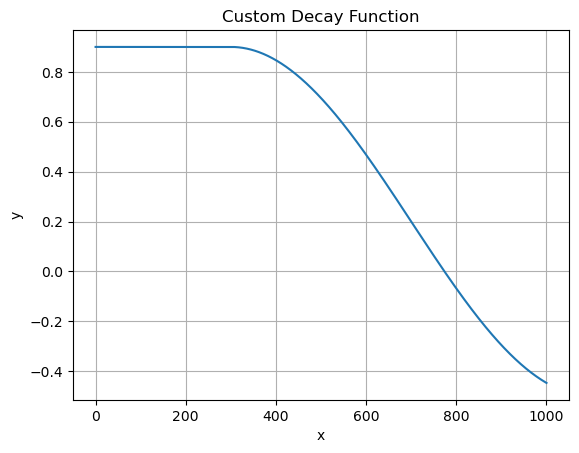

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def custom_decay_func(x, delay_period, upper_bound, lower_bound, delta_time):
    if x <= delay_period:
        return upper_bound
    elif delay_period < x < delay_period + delta_time:
        # Transition period: use cos function for decay
        # Scale x so that the transition period occurs between 0 and np.pi
        transition_x = (x - delay_period) / delta_time * np.pi
        # Scale and shift the cos function so that it decays from upper_bound to lower_bound
        return (-np.cos(transition_x) + 1) / 2 * (lower_bound - upper_bound) + upper_bound
    else:
        return lower_bound

# Create an array of x values and calculate the corresponding y values
x_values = np.linspace(0, 1000, 1000)
y_values = [custom_decay_func(x, delay_period=300, upper_bound=0.9, lower_bound=-0.5, delta_time=800) for x in x_values]

# Plot the custom decay function
plt.plot(x_values, y_values)
plt.title('Custom Decay Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
